#Rice diseases are classified by using CNN with tensorFlow


#import Libraires

In [ ]:
# prompt: Import Numpy  as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
path = "/content/drive/MyDrive/Paddy rice disease classification/train.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


#Check the shape of the data

In [ ]:
data.shape

(10407, 4)

#Output: hamara data mn 10407 images hai

In [ ]:
data['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [ ]:
data['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

#output: hamray dataset mn 10 diseases hn, 10 unique classes hai, rice plant age is ranging from 45 to 85 days

##plotting of data-count based on veriety name:

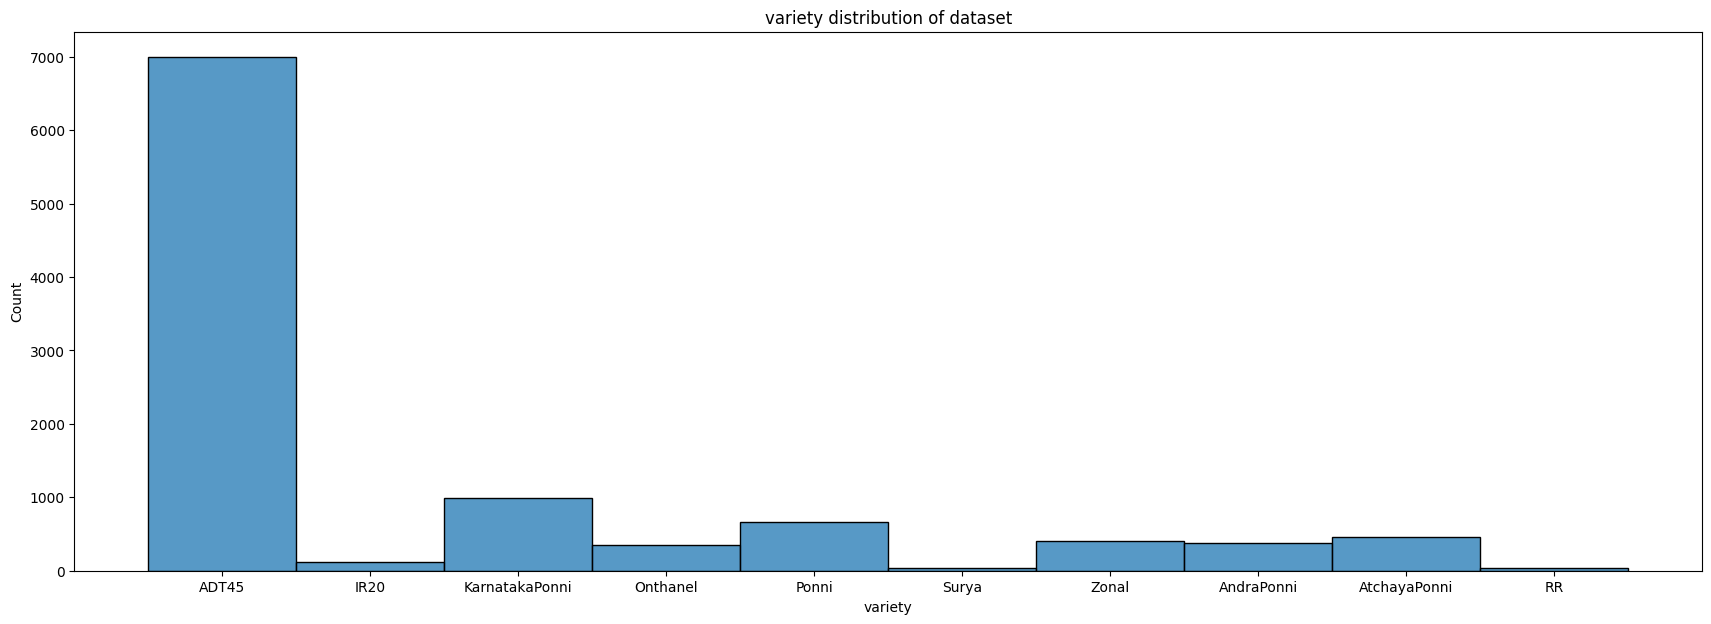

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data,x='variety', ax=axes)
plt.title('variety distribution of dataset')
plt.show()

#Output: adt45 is the most common variety in training data

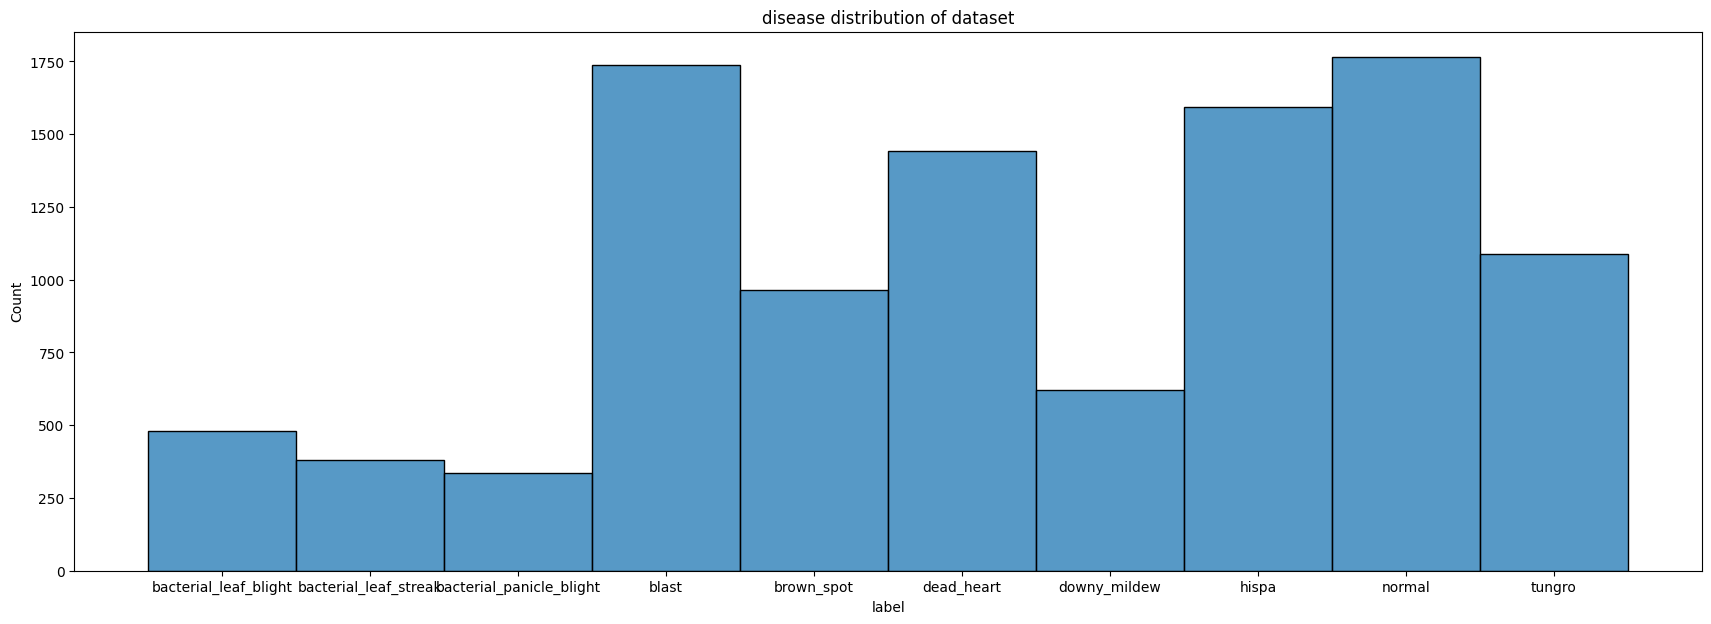

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(data,x='label', ax=axes)
plt.title('disease distribution of dataset')
plt.show()

##training dataset mn images kesi dikhti hn wo dekhty/


In [ ]:
normal = data[data['label']=='normal']
normal = normal[normal['variety']=='ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [ ]:
dead = data[data['label']=='dead_heart']
dead = dead[dead['variety']=='ADT45']
five_deads = dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

#now we have to print 5 normal and 5 dead images

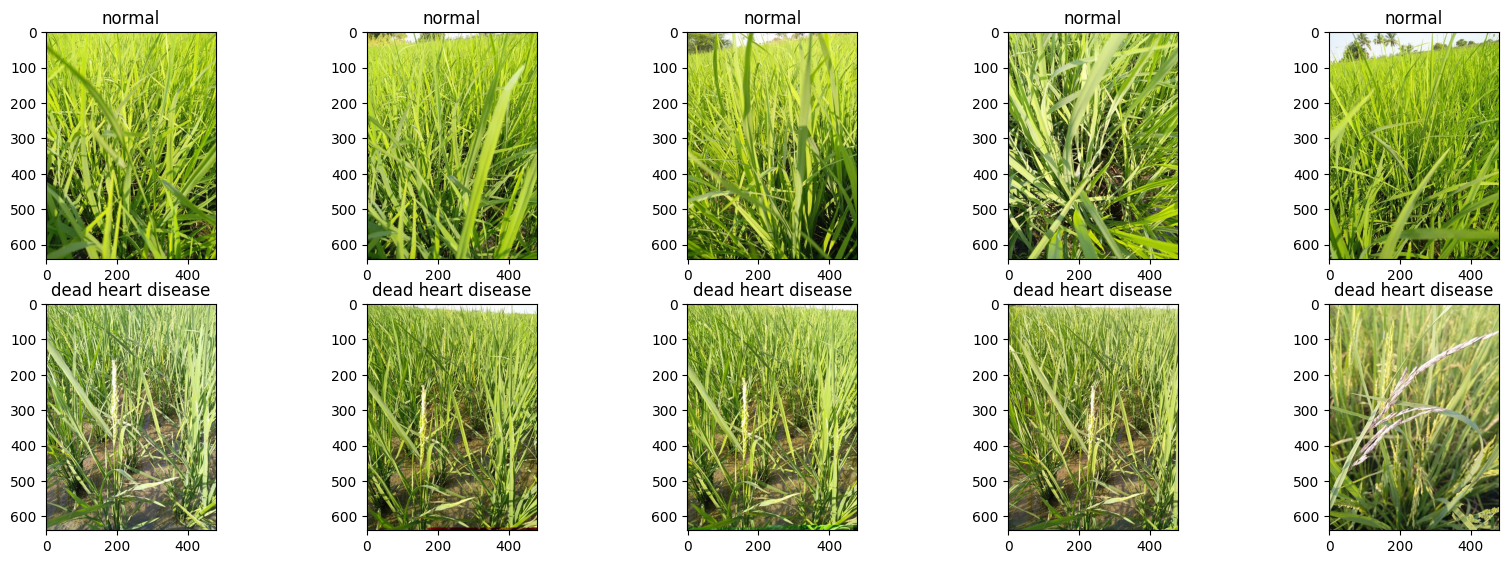

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))
columns = 5
path = "/content/drive/MyDrive/Paddy rice disease classification/Train images"

for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10 // columns + 1, columns, i + 1)
    if i < 5:
        image = plt.imread(path + "/normal/" + image_loc)
        plt.title("normal")
    else:
        plt.title("dead heart disease")
        image = plt.imread(path + "/dead_heart/" + image_loc)
    plt.imshow(image)

plt.show()

In [ ]:
batch_size = 32
img_height = 224
img_width = 224



In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 10407 files belonging to 10 classes.
Using 8326 files for training.


#10407 main sy 8326 minus kareen to baki data testing k lia hai

#ab hum validation datset banain gy

In [ ]:
import tensorflow as tf

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


#ab hum trainng dataset k class name print karen gy

In [ ]:
Class_names = train_ds.class_names
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for images, labels in train_ds.take(1):
  for i in range(18):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


#Ab hum basic image k size check karen gy

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 224, 224, 3)
(16,)


aik batch 16 images k hai kyu k hum ny upper define kia hai batch size=16, batch size means aik dafa kitni images ko proceed krna hai

#Ab  data py normalization layer apply krni hai, data ko normal krny k lia

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]  # corrected this line
# notice the pixel values are now in the range [0,1]
print(np.min(first_image), np.max(first_image))  # corrected this line


0.0 1.0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#AB hum apna model define karemn gy

In [ ]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),  # Corrected the loss function call
    metrics=['accuracy']  # Corrected the spelling of 'metrics'
)


#now we fit our model

Epoch 1/20
521/521 [==============================] - 824s 2s/step - loss: 0.0612 - accuracy: 0.9837 - val_loss: 1.2677 - val_accuracy: 0.8116
Epoch 2/20
521/521 [==============================] - 817s 2s/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 1.3574 - val_accuracy: 0.8121
Epoch 3/20
521/521 [==============================] - 788s 2s/step - loss: 0.0412 - accuracy: 0.9877 - val_loss: 1.6285 - val_accuracy: 0.7665
Epoch 4/20
521/521 [==============================] - 781s 1s/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 1.2201 - val_accuracy: 0.8140
Epoch 5/20
521/521 [==============================] - 806s 2s/step - loss: 0.0241 - accuracy: 0.9929 - val_loss: 1.3459 - val_accuracy: 0.8116
Epoch 6/20
521/521 [==============================] - 807s 2s/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 1.5625 - val_accuracy: 0.7833
Epoch 7/20
521/521 [==============================] - 820s 2s/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 1.6616 - val_accuracy: 0.8035

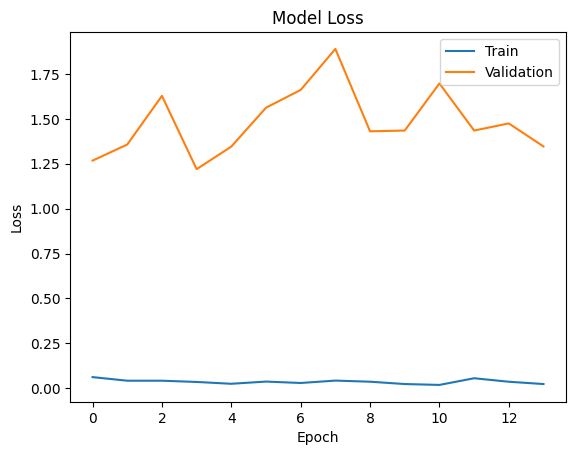

CPU times: user 4h 25min 8s, sys: 41min 47s, total: 5h 6min 56s
Wall time: 3h 13min 50s


In [ ]:
%%time
#remove warning
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping

#define the callback function
early_stopping = EarlyStopping(patience=10)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[early_stopping])  # corrected the callbacks argument

# evaluate the model
loss = model.evaluate(val_ds)

# plotting the training and testing loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # corrected the typo in this line
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()  # corrected the missing parentheses in this line



In [ ]:
_zise =